<a href="https://colab.research.google.com/github/taufiqhida/ecommece/blob/main/e_commece.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df = pd.read_csv("bread basket.csv")

In [ ]:
df.head()

,Transaction,Item,date_time,period_day,weekday_weekend
0,1,Bread,30-10-2016 09:58,morning,weekend
1,2,Scandinavian,30-10-2016 10:05,morning,weekend
2,2,Scandinavian,30-10-2016 10:05,morning,weekend
3,3,Hot chocolate,30-10-2016 10:07,morning,weekend
4,3,Jam,30-10-2016 10:07,morning,weekend


In [ ]:
df.describe()

,Transaction
count,20507.000000
mean,4976.202370
std,2796.203001
min,1.000000
25%,2552.000000
50%,5137.000000
75%,7357.000000
max,9684.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20507 entries, 0 to 20506
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Transaction      20507 non-null  int64 
 1   Item             20507 non-null  object
 2   date_time        20507 non-null  object
 3   period_day       20507 non-null  object
 4   weekday_weekend  20507 non-null  object
dtypes: int64(1), object(4)
memory usage: 801.2+ KB


In [ ]:
df['date_time'] = pd.to_datetime(df['date_time'])

In [ ]:
df.head(10)

,Transaction,Item,date_time,period_day,weekday_weekend
0,1,Bread,2016-10-30 09:58:00,morning,weekend
1,2,Scandinavian,2016-10-30 10:05:00,morning,weekend
2,2,Scandinavian,2016-10-30 10:05:00,morning,weekend
3,3,Hot chocolate,2016-10-30 10:07:00,morning,weekend
4,3,Jam,2016-10-30 10:07:00,morning,weekend
5,3,Cookies,2016-10-30 10:07:00,morning,weekend
6,4,Muffin,2016-10-30 10:08:00,morning,weekend
7,5,Coffee,2016-10-30 10:13:00,morning,weekend
8,5,Pastry,2016-10-30 10:13:00,morning,weekend
9,5,Bread,2016-10-30 10:13:00,morning,weekend


In [ ]:
df['Transaction'].unique()

array([   1,    2,    3, ..., 9682, 9683, 9684])

In [ ]:
# Extracting date
df['date'] = df['date_time'].dt.date

#Extracting time
df['time'] = df['date_time'].dt.time

# Extracting month and replacing it with text
df['month'] = df['date_time'].dt.month
df['month'] = df['month'].replace((1,2,3,4,5,6,7,8,9,10,11,12),
                                          ('January','February','March','April','May','June','July','August',
                                          'September','October','November','December'))

# Extracting hour
df['hour'] = df['date_time'].dt.hour
# Replacing hours with text
hour_in_num = (1,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23)
hour_in_obj = ('1-2','7-8','8-9','9-10','10-11','11-12','12-13','13-14','14-15',
               '15-16','16-17','17-18','18-19','19-20','20-21','21-22','22-23','23-24')
df['hour'] = df['hour'].replace(hour_in_num, hour_in_obj)

# Extracting weekday and replacing it with text
df['weekday'] = df['date_time'].dt.weekday
df['weekday'] = df['weekday'].replace((0,1,2,3,4,5,6),
                                          ('Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'))

# dropping date_time column
df.drop('date_time', axis = 1, inplace = True)

In [ ]:
# cleaning the item column
df['Item'] = df['Item'].str.strip()
df['Item'] = df['Item'].str.lower()

<ipython-input-66-c3f4536dd57c>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = df.Item.value_counts().head(20).index, y = df.Item.value_counts().head(20).values, palette = 'gnuplot')


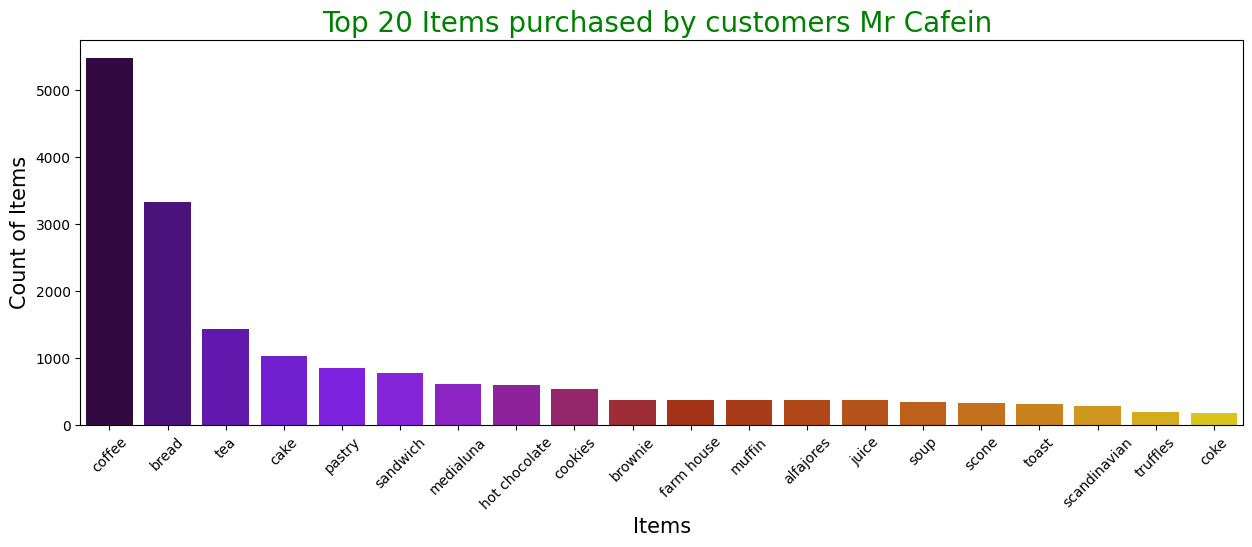

In [ ]:
# DATA VISUAL CEK

plt.figure(figsize=(15,5))
sns.barplot(x = df.Item.value_counts().head(20).index, y = df.Item.value_counts().head(20).values, palette = 'gnuplot')
plt.xlabel('Items', size = 15)
plt.xticks(rotation=45)
plt.ylabel('Count of Items', size = 15)
plt.title('Top 20 Items purchased by customers Mr Cafein ', color = 'green', size = 20)
plt.show()